# Import thư viện

In [ ]:
from google.colab import drive
import os
import cv2
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import hog
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/My Drive")

In [ ]:
#!unzip MY_data_1.zip

In [ ]:
data_path = "/content/drive/My Drive"

In [ ]:
train_dir = os.path.join(data_path, "train")
test_dir = os.path.join(data_path, "test")

# hog + ảnh xám màu

In [ ]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.preprocessing import LabelEncoder

def load_data(data_dir, categories, target_size=(256, 256)):
    images = []
    labels = []

    label_encoder = LabelEncoder()
    label_encoder.fit(categories)

    for category in categories:
        category_path = os.path.join(data_dir, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                # Chuyển đổi kích thước ảnh
                img_resized = cv2.resize(img, target_size)
                # Chuyển đổi ảnh sang màu xám
                img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
                # Trích xuất đặc trưng HOG từ ảnh xám
                hog_features = hog(img_gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', feature_vector=True)
                images.append(hog_features)
                labels.append(category)

    print("Number of images:", len(images))
    print("Number of labels:", len(labels))

    # Chuyển đổi nhãn thành số nguyên
    encoded_labels = label_encoder.transform(labels)

    return np.array(images), encoded_labels


In [ ]:
categories = ["Apple", "Banana", "Cherry", "Kiwi", "Orange", "Pineapple", "Strawberries"]
X_train, y_train = load_data(train_dir, categories, target_size=(256, 256))
X_test, y_test = load_data(test_dir, categories, target_size=(256, 256))


Number of images: 1931
Number of labels: 1931
Number of images: 710
Number of labels: 710


## Random Forest

In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_
print(rf_best_model)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200,
                       random_state=42)


In [ ]:
# Khởi tạo mô hình RandomForestClassifier với các tham số tốt nhất
"""rf_best_model = RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)"""

'rf_best_model = RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,\n                       n_estimators=200, random_state=42)'

In [ ]:
rf_best_model = RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200,
                       random_state=42)

In [ ]:
# Huấn luyện mô hình
rf_best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200,
                       random_state=42)

In [ ]:
# Dự đoán nhãn cho tập kiểm tra
y_pred = rf_best_model.predict(X_test)

In [ ]:
# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# In báo cáo phân loại
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=categories))


Accuracy on test set: 0.7197
Classification report:
              precision    recall  f1-score   support

       Apple       0.76      0.81      0.78        89
      Banana       0.65      0.72      0.68       106
      Cherry       0.69      0.68      0.68       105
        Kiwi       0.67      0.65      0.66       105
      Orange       0.74      0.49      0.59        97
   Pineapple       0.90      0.90      0.90       105
Strawberries       0.66      0.80      0.72       103

    accuracy                           0.72       710
   macro avg       0.72      0.72      0.72       710
weighted avg       0.72      0.72      0.72       710



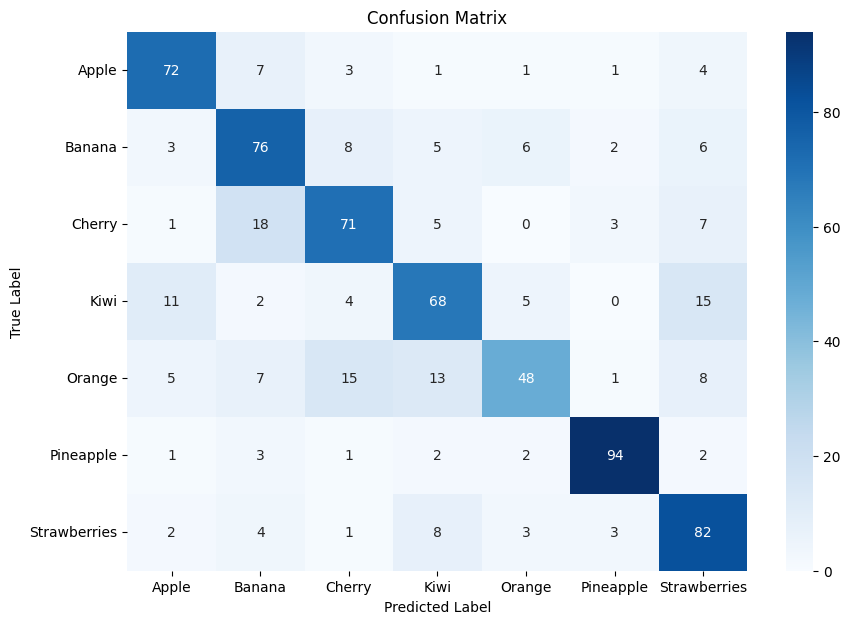

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tính tỷ lệ phần trăm cho từng ô trong confusion matrix
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Vẽ confusion matrix với độ chính xác
plt.figure(figsize=(10, 7))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Accuracy %)')
plt.show()

## KNN

In [ ]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)
knn_best_model = knn_grid_search.best_estimator_
print(knn_best_model)

KNeighborsClassifier(metric='manhattan', weights='distance')


In [ ]:
knn_best_model = KNeighborsClassifier(metric='manhattan', weights='distance')

In [ ]:
knn_best_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [ ]:
y_pred = knn_best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# In báo cáo phân loại
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy on test set: 0.7042
Classification report:
              precision    recall  f1-score   support

       Apple       0.70      0.87      0.77        89
      Banana       0.83      0.69      0.75       106
      Cherry       0.87      0.52      0.65       105
        Kiwi       0.66      0.62      0.64       105
      Orange       0.70      0.56      0.62        97
   Pineapple       0.86      0.90      0.88       105
Strawberries       0.50      0.79      0.61       103

    accuracy                           0.70       710
   macro avg       0.73      0.71      0.70       710
weighted avg       0.73      0.70      0.70       710



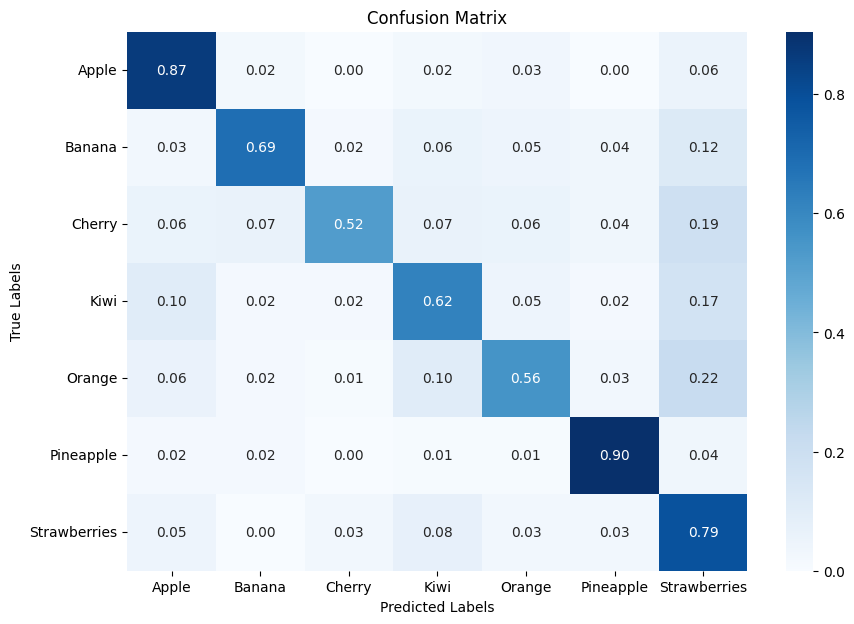

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Chuẩn hóa confusion matrix theo đơn vị phần trăm
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Vẽ confusion matrix chuẩn hóa
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## SVM

In [ ]:
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

In [ ]:
svm = SVC(probability=True)

In [ ]:
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)
svm_best_model = svm_grid_search.best_estimator_

In [ ]:
print(svm_best_model)

In [ ]:
svm_best_model = SVC(C=10, gamma='scale', kernel='rbf', probability=True)

In [ ]:
svm_best_model.fit(X_train, y_train)

SVC(C=10, probability=True)

In [ ]:
y_pred = svm_best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# In báo cáo phân loại
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy on test set: 0.7310
Classification report:
              precision    recall  f1-score   support

       Apple       0.79      0.81      0.80        89
      Banana       0.70      0.70      0.70       106
      Cherry       0.59      0.66      0.62       105
        Kiwi       0.72      0.75      0.73       105
      Orange       0.67      0.57      0.61        97
   Pineapple       0.93      0.89      0.91       105
Strawberries       0.73      0.75      0.74       103

    accuracy                           0.73       710
   macro avg       0.73      0.73      0.73       710
weighted avg       0.73      0.73      0.73       710



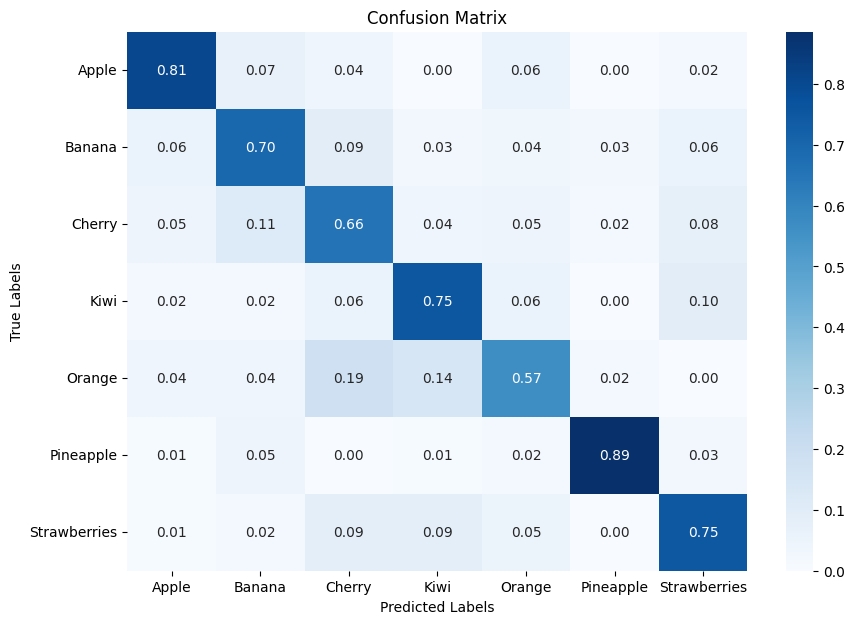

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Chuẩn hóa confusion matrix theo đơn vị phần trăm
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Vẽ confusion matrix chuẩn hóa
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Có hog + ảnh màu

In [ ]:
def load_data(data_dir, categories, target_size=(256, 256)):
    images = []
    labels = []

    label_encoder = LabelEncoder()
    label_encoder.fit(categories)

    for category in categories:
        category_path = os.path.join(data_dir, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                # Chuyển đổi kích thước ảnh
                img_resized = cv2.resize(img, target_size)
                # Trích xuất đặc trưng HOG từ ảnh
                hog_features = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', feature_vector=True, multichannel=True)
                images.append(hog_features)
                labels.append(category)

    print("Number of images:", len(images))
    print("Number of labels:", len(labels))

    # Chuyển đổi nhãn thành số nguyên
    encoded_labels = label_encoder.transform(labels)

    return np.array(images), encoded_labels

In [ ]:
categories = ["Apple", "Banana", "Cherry", "Kiwi", "Orange", "Pineapple", "Strawberries"]
X_train, y_train = load_data(train_dir, categories, target_size=(256, 256))
X_test, y_test = load_data(test_dir, categories, target_size=(256, 256))


<ipython-input-9-7df56db6c40b>:17: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', feature_vector=True, multichannel=True)


Number of images: 1931
Number of labels: 1931


<ipython-input-9-7df56db6c40b>:17: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features = hog(img_resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys', feature_vector=True, multichannel=True)


Number of images: 710
Number of labels: 710


##RF

In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_
print(rf_best_model)
# Huấn luyện mô hình
rf_best_model.fit(X_train, y_train)
# Dự đoán nhãn cho tập kiểm tra
y_pred = rf_best_model.predict(X_test)
# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# In báo cáo phân loại
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=categories))


KeyboardInterrupt: 

In [ ]:
print(rf_best_model)

NameError: name 'rf_best_model' is not defined

## KNN

In [ ]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)
knn_best_model = knn_grid_search.best_estimator_
print(knn_best_model)

In [ ]:
knn_best_model.fit(X_train, y_train)

In [ ]:
y_pred = knn_best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# In báo cáo phân loại
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=categories))

# Ko hog + có ảnh xám màu

In [ ]:
def load_data(data_dir, categories, target_size=(256, 256)):
    images = []
    labels = []

    label_encoder = LabelEncoder()
    label_encoder.fit(categories)

    for category in categories:
        category_path = os.path.join(data_dir, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # Thay đổi kích thước ảnh
                img_resized = cv2.resize(img, target_size)
                images.append(img_resized)
                labels.append(category)

    print("Number of images:", len(images))
    print("Number of labels:", len(labels))

    # Chuyển đổi nhãn thành số nguyên
    encoded_labels = label_encoder.transform(labels)

    return np.array(images), encoded_labels


In [ ]:
categories = ["Apple", "Banana", "Cherry", "Kiwi", "Orange", "Pineapple", "Strawberries"]
X_train, y_train = load_data(train_dir, categories, target_size=(256, 256))
X_test, y_test = load_data(test_dir, categories, target_size=(256, 256))


Number of images: 1931
Number of labels: 1931
Number of images: 710
Number of labels: 710


In [ ]:
categories = ["Apple", "Banana", "Cherry", "Kiwi", "Orange", "Pineapple", "Strawberries"]

In [ ]:
X_train, y_train = load_data(train_dir, categories, (256,256))
X_test, y_test = load_data(test_dir, categories, (256,256))

Number of images: 1931
Number of labels: 1931
Number of images: 710
Number of labels: 710


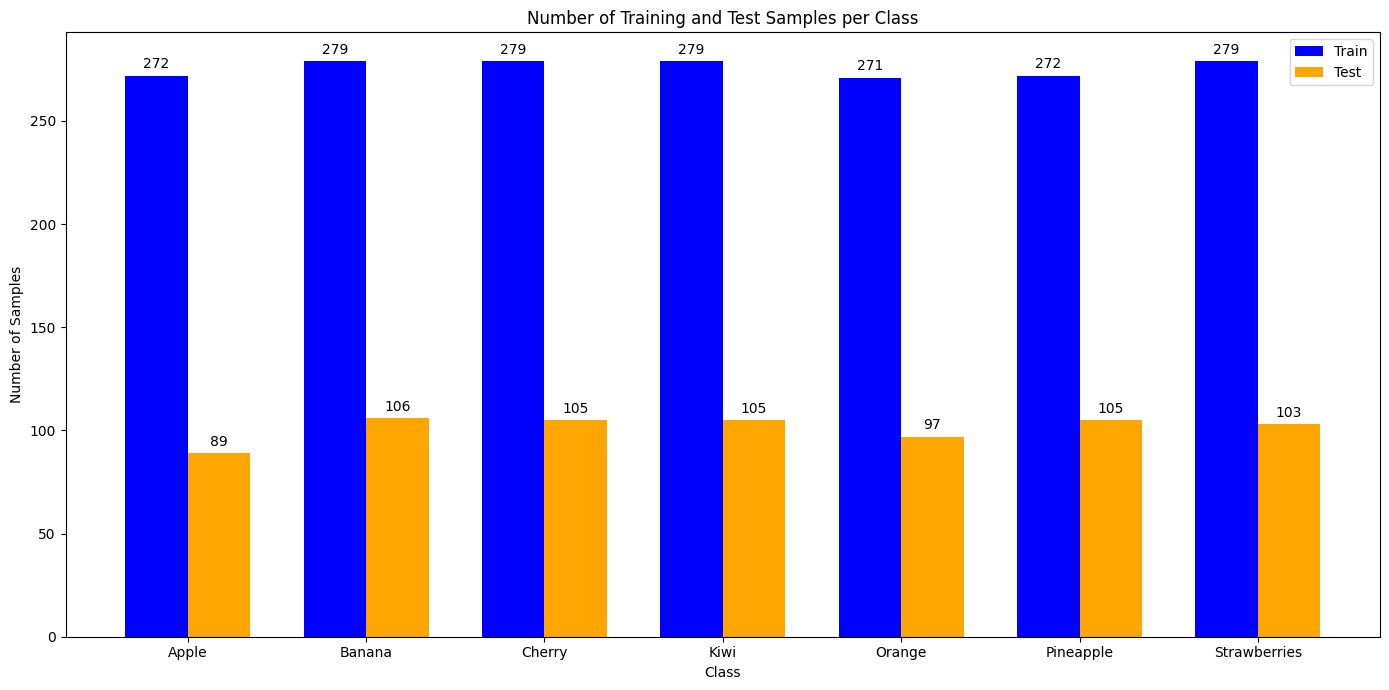

In [ ]:
# Count samples for each class in train and test sets
train_counts = np.bincount(y_train, minlength=len(categories))
test_counts = np.bincount(y_test, minlength=len(categories))

# Combined bar width and positions
bar_width = 0.35
indices = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(14, 7))

# Plot train samples
bars1 = ax.bar(indices, train_counts, bar_width, label='Train', color='blue')

# Plot test samples next to train samples
bars2 = ax.bar(indices + bar_width, test_counts, bar_width, label='Test', color='orange')

# Adding text annotations
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Adding labels, title, and legend
ax.set_xlabel('Class')
ax.set_ylabel('Number of Samples')
ax.set_title('Number of Training and Test Samples per Class')
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

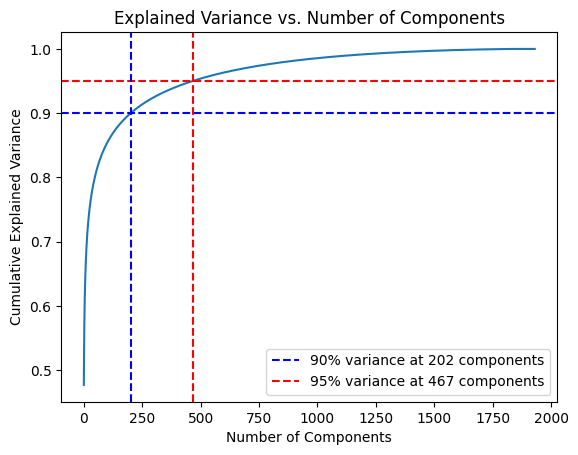

Number of components for 90% variance: 202
Number of components for 95% variance: 467


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Áp dụng PCA
# Chuẩn bị dữ liệu cho PCA
X_train_testPCA = X_train.reshape((X_train.shape[0], -1))
X_test_testPCA = X_test.reshape((X_test.shape[0], -1))

pca = PCA().fit(X_train_testPCA)
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Xác định số thành phần khi variance đạt 0.9 và 0.95
components_90 = np.argmax(explained_variance_ratio >= 0.90) + 1
components_95 = np.argmax(explained_variance_ratio >= 0.95) + 1

# Vẽ biểu đồ
plt.plot(explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.90, color='b', linestyle='--', label=f'90% variance at {components_90} components')
plt.axhline(y=0.95, color='r', linestyle='--', label=f'95% variance at {components_95} components')
plt.axvline(x=components_90, color='b', linestyle='--')
plt.axvline(x=components_95, color='r', linestyle='--')
plt.title('Explained Variance vs. Number of Components')
plt.legend(loc='best')
plt.show()

print(f'Number of components for 90% variance: {components_90}')
print(f'Number of components for 95% variance: {components_95}')


In [ ]:
# Print the shapes of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1931, 256, 256)
y_train shape: (1931,)
X_test shape: (710, 256, 256)
y_test shape: (710,)


In [ ]:
# Làm phẳng dữ liệu hình ảnh
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
import numpy as np

# Giả sử X_train và X_test là các numpy arrays
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)

In [ ]:
from google.colab import files

# Tải file X_train.npy
files.download('X_train.npy')

# Tải file X_test.npy
files.download('X_test.npy')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## SVM

In [ ]:
# Khởi tạo mô hình SVM với các tham số tốt nhất
svm_best_model = SVC(C=1, probability=True)

# Huấn luyện mô hình với dữ liệu đã làm phẳng
svm_best_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = svm_best_model.predict(X_test)

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# In báo cáo phân loại
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy on test set: 0.5930
Classification report:
              precision    recall  f1-score   support

       Apple       0.62      0.54      0.58        89
      Banana       0.49      0.54      0.51       106
      Cherry       0.65      0.63      0.64       105
        Kiwi       0.62      0.60      0.61       105
      Orange       0.50      0.64      0.56        97
   Pineapple       0.78      0.65      0.71       105
Strawberries       0.55      0.55      0.55       103

    accuracy                           0.59       710
   macro avg       0.60      0.59      0.59       710
weighted avg       0.60      0.59      0.60       710



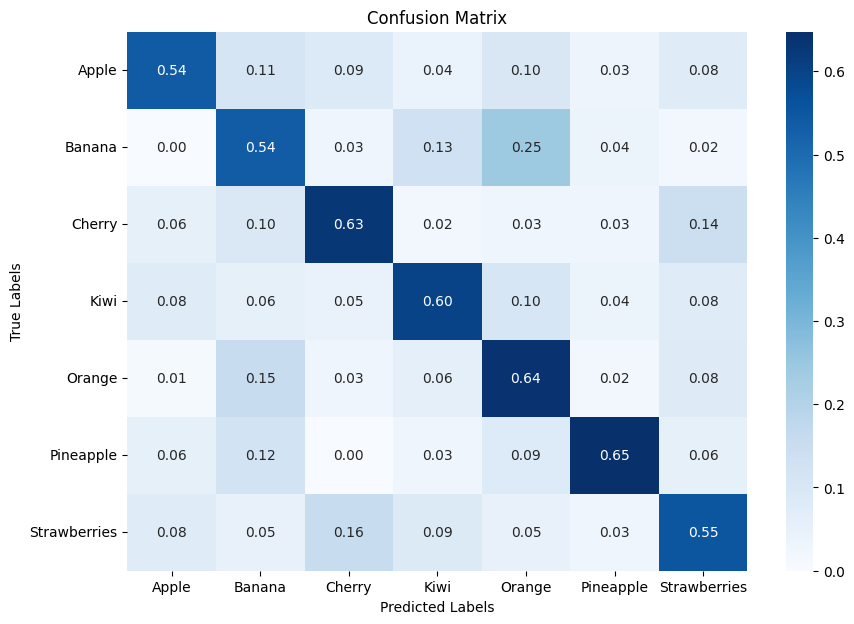

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Chuẩn hóa confusion matrix theo đơn vị phần trăm
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Vẽ confusion matrix chuẩn hóa
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print("Ok svm")

Ok svm


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import thư viện cần thiết
import joblib
import os

# Đường dẫn đến thư mục trên Google Drive
drive_path = '/content/drive/My Drive/'

# Đặt tên cho file mô hình
model_filename = 'svm_best_model.pkl'

# Lưu mô hình sử dụng joblib
model_path = os.path.join(drive_path, model_filename)
joblib.dump(svm_best_model, model_path)

print(f'Model has been saved to {model_path}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model has been saved to /content/drive/My Drive/svm_best_model.pkl


## KNN

In [ ]:
# Khởi tạo mô hình KNN với các tham số tốt nhất
knn_best_model = KNeighborsClassifier(metric='manhattan', weights='distance')

# Huấn luyện mô hình với dữ liệu
knn_best_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = knn_best_model.predict(X_test)

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# In báo cáo phân loại
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy on test set: 0.7014
Classification report:
              precision    recall  f1-score   support

       Apple       0.75      0.85      0.80        89
      Banana       0.72      0.62      0.67       106
      Cherry       0.89      0.59      0.71       105
        Kiwi       0.73      0.64      0.68       105
      Orange       0.48      0.71      0.57        97
   Pineapple       0.73      0.90      0.81       105
Strawberries       0.78      0.61      0.68       103

    accuracy                           0.70       710
   macro avg       0.72      0.70      0.70       710
weighted avg       0.73      0.70      0.70       710



In [ ]:
print("Ok knn")

Ok knn


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import thư viện cần thiết
import joblib
import os

# Đường dẫn đến thư mục trên Google Drive
drive_path = '/content/drive/My Drive/'

# Đặt tên cho file mô hình
model_filename = 'knn_best_model.pkl'

# Lưu mô hình sử dụng joblib
model_path = os.path.join(drive_path, model_filename)
joblib.dump(knn_best_model, model_path)

print(f'Model has been saved to {model_path}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model has been saved to /content/drive/My Drive/knn_best_model.pkl


## Random Forest

In [ ]:
# Khởi tạo mô hình KNN với các tham số tốt nhất
rf_best_model = RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

# Huấn luyện mô hình với dữ liệu
rf_best_model.fit(X_train, y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = rf_best_model.predict(X_test)

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# In báo cáo phân loại
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy on test set: 0.7521
Classification report:
              precision    recall  f1-score   support

       Apple       0.88      0.83      0.86        89
      Banana       0.73      0.62      0.67       106
      Cherry       0.75      0.70      0.73       105
        Kiwi       0.71      0.73      0.72       105
      Orange       0.68      0.73      0.70        97
   Pineapple       0.78      0.90      0.84       105
Strawberries       0.76      0.76      0.76       103

    accuracy                           0.75       710
   macro avg       0.75      0.75      0.75       710
weighted avg       0.75      0.75      0.75       710



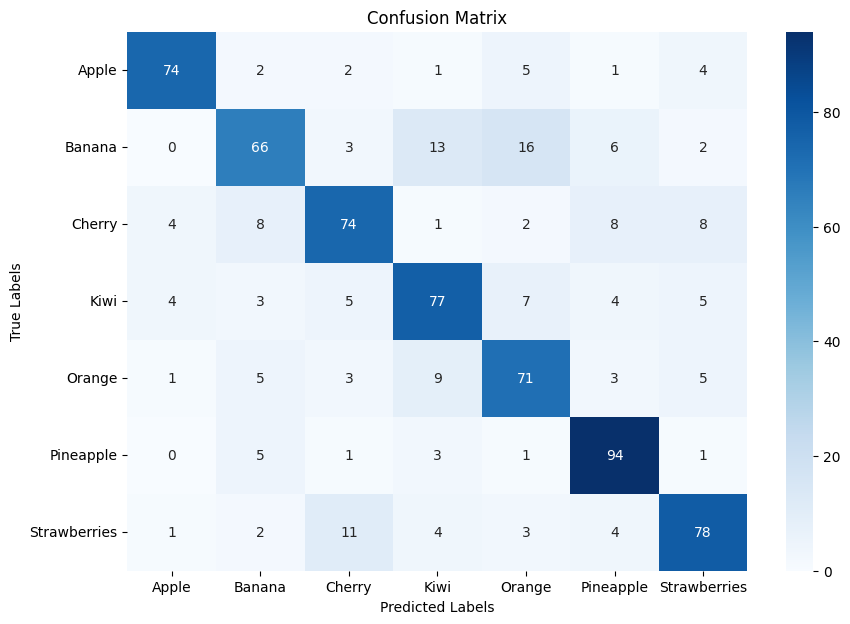

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


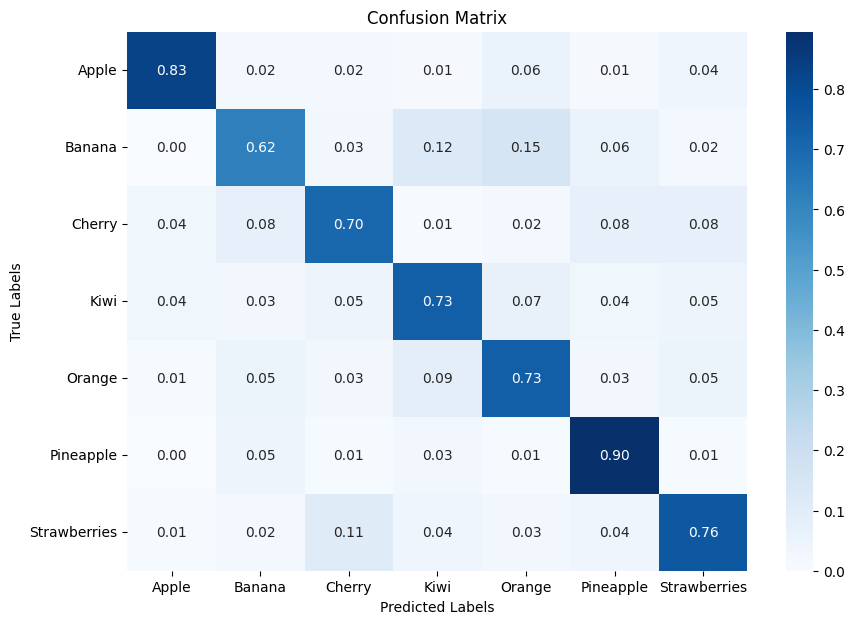

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Chuẩn hóa confusion matrix theo đơn vị phần trăm
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Vẽ confusion matrix chuẩn hóa
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import thư viện cần thiết
import joblib
import os

# Đường dẫn đến thư mục trên Google Drive
drive_path = '/content/drive/My Drive/'

# Đặt tên cho file mô hình
model_filename = 'rf_best_model.pkl'

# Lưu mô hình sử dụng joblib
model_path = os.path.join(drive_path, model_filename)
joblib.dump(rf_best_model, model_path)

print(f'Model has been saved to {model_path}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model has been saved to /content/drive/My Drive/rf_best_model.pkl


In [ ]:
# Định nghĩa hàm dự đoán nhãn của một hình ảnh
def predict_image_label(model, categories, img_path, target_size=(256, 256)):
    # Tải và tiền xử lý hình ảnh
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found or unable to read: {img_path}")

    img_resized = cv2.resize(img, target_size)
    img_reshaped = img_resized.reshape(1, -1)  # Chuyển đổi thành dạng 2D (1, số lượng đặc trưng)

    # Chuẩn hóa dữ liệu
    #img_scaled = scaler.transform(img_reshaped)

    # Dự đoán nhãn
    y_pred = model.predict(img_reshaped)

    # Lấy tên nhãn từ số nhãn dự đoán
    label = categories[y_pred[0]]

    return label

In [ ]:
# Ví dụ sử dụng hàm predict_image_label
img_path = '/kaggle/input/fruit-fruit/MY_data/predict/66.jpeg'  # Thay đổi thành đường dẫn thực tế
predicted_label = predict_image_label(rf_best_model, categories,  img_path)
print(f"Random Forest: {predicted_label}")
predicted_label = predict_image_label(svm_best_model, categories,  img_path)
print(f"SVM: {predicted_label}")
predicted_label = predict_image_label(knn_best_model, categories, img_path)
print(f"KNN: {predicted_label}")

# Voting model + Hog

In [ ]:
# Khởi tạo mô hình SVM với các tham số tốt nhất
svm_best_model = SVC(C=10, probability=True)
# Khởi tạo mô hình KNN với các tham số tốt nhất
knn_best_model = KNeighborsClassifier(metric='manhattan', weights='distance')
# Khởi tạo mô hình KNN với các tham số tốt nhất
rf_best_model = RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200,
                       random_state=42)

In [ ]:
# Giả sử bạn đã có các mô hình tốt nhất: rf_best_model, svm_best_model, knn_best_model
voting_model = VotingClassifier(
    estimators=[
        ('rf', rf_best_model),
        ('svm', svm_best_model),
        ('knn', knn_best_model)
    ],
    voting='hard'
)

In [ ]:
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_split=10,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('svm', SVC(C=10, probability=True)),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   weights='distance'))])

In [ ]:
from sklearn.ensemble import VotingClassifier
import pickle
from google.colab import drive

# Lưu mô hình VotingClassifier vào một file
model_path = '/content/voting_model2.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(voting_model, file)

# Gắn Google Drive
drive.mount('/content/drive')

# Sao chép file vào Google Drive
!cp /content/voting_model2.pkl /content/drive/My\ Drive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dự đoán nhãn cho tập kiểm tra
y_pred = voting_model.predict(X_test)

In [ ]:
# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# In báo cáo phân loại
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy on test set: 0.7366
Classification report:
              precision    recall  f1-score   support

       Apple       0.67      0.83      0.74        89
      Banana       0.69      0.77      0.73       106
      Cherry       0.69      0.68      0.68       105
        Kiwi       0.72      0.67      0.69       105
      Orange       0.81      0.53      0.64        97
   Pineapple       0.97      0.89      0.93       105
Strawberries       0.68      0.80      0.73       103

    accuracy                           0.74       710
   macro avg       0.75      0.74      0.73       710
weighted avg       0.75      0.74      0.74       710



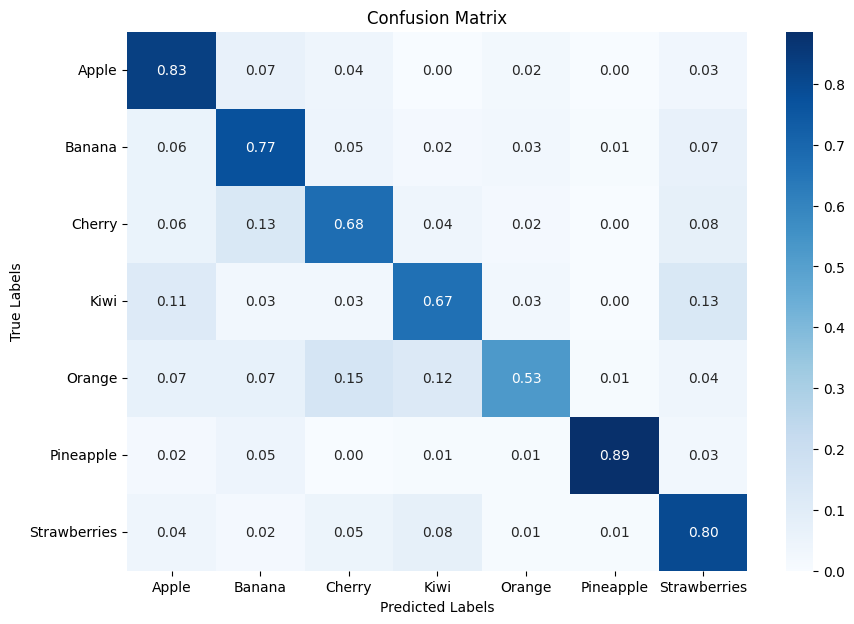

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Chuẩn hóa confusion matrix theo đơn vị phần trăm
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Vẽ confusion matrix chuẩn hóa
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Voting model

In [ ]:
# Khởi tạo mô hình SVM với các tham số tốt nhất
svm_best_model = SVC(C=1, probability=True)
# Khởi tạo mô hình KNN với các tham số tốt nhất
knn_best_model = KNeighborsClassifier(metric='manhattan', weights='distance')
# Khởi tạo mô hình KNN với các tham số tốt nhất
rf_best_model = RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [ ]:
accuracy_svm = 0.5930
accuracy_knn = 0.7014
accuracy_rf = 0.7521

# Tính tổng độ chính xác
total_accuracy = accuracy_svm + accuracy_knn + accuracy_rf

# Gán trọng số tỷ lệ theo độ chính xác
weights = [
    accuracy_rf / total_accuracy,  # Trọng số của RF
    accuracy_svm / total_accuracy,  # Trọng số của SVM
    accuracy_knn / total_accuracy   # Trọng số của KNN
]

print("Trọng số: ", weights)


Trọng số:  [0.36750549719032494, 0.28976301001710236, 0.3427314927925727]


## Hard voting

In [ ]:
# Giả sử bạn đã có các mô hình tốt nhất: rf_best_model, svm_best_model, knn_best_model
voting_model = VotingClassifier(
    estimators=[
        ('rf', rf_best_model),
        ('svm', svm_best_model),
        ('knn', knn_best_model)
    ],
    voting='hard' # Trọng số tương ứng cho các mô hình: rf, svm, knn
)

In [ ]:
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('svm', SVC(C=1, probability=True)),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   weights='distance'))])

In [ ]:
from sklearn.ensemble import VotingClassifier
import pickle
from google.colab import drive

# Lưu mô hình VotingClassifier vào một file
model_path = '/content/voting_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(voting_model, file)

# Gắn Google Drive
drive.mount('/content/drive')

# Sao chép file vào Google Drive
!cp /content/voting_model.pkl /content/drive/My\ Drive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dự đoán nhãn cho tập kiểm tra
y_pred = voting_model.predict(X_test)

In [ ]:
# Tính toán độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

# In báo cáo phân loại
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy on test set: 0.7408
Classification report:
              precision    recall  f1-score   support

       Apple       0.79      0.85      0.82        89
      Banana       0.66      0.68      0.67       106
      Cherry       0.73      0.68      0.70       105
        Kiwi       0.72      0.73      0.73       105
      Orange       0.65      0.70      0.68        97
   Pineapple       0.87      0.90      0.88       105
Strawberries       0.76      0.66      0.71       103

    accuracy                           0.74       710
   macro avg       0.74      0.74      0.74       710
weighted avg       0.74      0.74      0.74       710



In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import thư viện cần thiết
import joblib
import os

# Đường dẫn đến thư mục trên Google Drive
drive_path = '/content/drive/My Drive/'

# Đặt tên cho file mô hình
model_filename = 'voting_model.pkl'

# Lưu mô hình sử dụng joblib
model_path = os.path.join(drive_path, model_filename)
joblib.dump(voting_model, model_path)

print(f'Model has been saved to {model_path}')


In [ ]:
import cv2
import numpy as np
import requests
from io import BytesIO

def predict_image(model, categories, img_url, target_size=(256, 256)):
    # Tải và tiền xử lý hình ảnh từ URL
    response = requests.get(img_url)
    if response.status_code != 200:
        raise ValueError(f"Unable to download image: {img_url}")

    img_array = np.array(bytearray(response.content), dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)

    if img is None:
        raise ValueError(f"Image not found or unable to read from URL: {img_url}")

    img_resized = cv2.resize(img, target_size)
    img_reshaped = img_resized.reshape(1, -1)  # Chuyển đổi thành dạng 2D (1, số lượng đặc trưng)

    # Dự đoán nhãn
    y_pred = model.predict(img_reshaped)

    # Lấy tên nhãn từ số nhãn dự đoán
    label = categories[y_pred[0]]

    return label

# Ví dụ sử dụng:
img_url = 'https://www.foodrepublic.com/img/gallery/take-the-sting-out-of-pineapple-with-a-salt-water-soak/intro-1684948369.jpg'
label = predict_image(voting_model, categories, img_url)
print(f'The predicted label is: {label}')


The predicted label is: Pineapple


In [ ]:
# Ví dụ sử dụng hàm predict_imagevới Voting Classifier
img_path = 'https://www.health.com/thmb/tbrMLOPX9NXT3fE6LDZxWaqhIjo=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/Pineapple-23bf3fe789f64777a6e31bbaa77ea479.jpg'  #
predicted_label = predict_image(voting_model, categories,img_path)
print(f"Voting Classifier: {predicted_label}")


Voting Classifier: Kiwi


In [ ]:
import joblib
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Đường dẫn đến thư mục trên Google Drive để lưu và load các model
folder_path = '/content/drive/My Drive/models/'

# Lưu các models
joblib.dump(voting_model, folder_path + 'voting_model.pkl')
joblib.dump(rf_best_model, folder_path + 'rf_best_model.pkl')
joblib.dump(svm_best_model, folder_path + 'svm_best_model.pkl')
joblib.dump(knn_best_model, folder_path + 'knn_best_model.pkl')

# Cmt lệnh lưu và sử dụng lệnh load dưới đây để giả lập việc load model từ một session hoặc script mới
# Load các models
voting_model = joblib.load(folder_path + 'voting_model.pkl')
rf_best_model = joblib.load(folder_path + 'rf_best_model.pkl')
svm_best_model = joblib.load(folder_path + 'svm_best_model.pkl')
knn_best_model = joblib.load(folder_path + 'knn_best_model.pkl')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/models/voting_model.pkl'